# Approach of the Analysis

To categorize or cluster the leads as hot leads and cold leads by analysing the past data provided by X Education Company.

# Importing Dataset

In [1]:
# Import required libraries/packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import StandardScaler

import warnings # To supress unnecessary warnings
warnings.filterwarnings('ignore')

# Reading and Understanding Data

In [2]:
#Reading the data file using pandas
df = pd.read_csv(r'E:\Data Science\Upgrad\ML\Course Project - Lead Scoring\Lead Scoring Assignment\Leads.csv')

df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
# check the shape of the dataset
df.shape

(9240, 37)

In [4]:
# check statistics for numerical columns
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [5]:
# check whether there are any duplicates
df.duplicated().sum()

0

In [6]:
#Let's have a look at all the columns, their datatypes and also get an idea of whether null values are present or not
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

**Observations**
* A large number of columns have null values. These columns should be dropped.
* Both `Prospect ID` and `Lead Number`serve the same purpose of being unique identifiers. We will drop `Prospect ID.
* Column names are too long. We will modify the column names.
* Few categorical columns have "Select" in their entries. Those are essentially null values because 'Select; appears when someone does not select anything from the dropdown.

# Data Cleaning

# Rename column names

We will follow Python's preferred Snakecase nomenclature to make the column names concie and readable.

In [7]:
# change nomenclature to snakecase
df.columns = df.columns.str.replace(' ', '_').str.lower()

# test
df.columns

Index(['prospect_id', 'lead_number', 'lead_origin', 'lead_source',
       'do_not_email', 'do_not_call', 'converted', 'totalvisits',
       'total_time_spent_on_website', 'page_views_per_visit', 'last_activity',
       'country', 'specialization', 'how_did_you_hear_about_x_education',
       'what_is_your_current_occupation',
       'what_matters_most_to_you_in_choosing_a_course', 'search', 'magazine',
       'newspaper_article', 'x_education_forums', 'newspaper',
       'digital_advertisement', 'through_recommendations',
       'receive_more_updates_about_our_courses', 'tags', 'lead_quality',
       'update_me_on_supply_chain_content', 'get_updates_on_dm_content',
       'lead_profile', 'city', 'asymmetrique_activity_index',
       'asymmetrique_profile_index', 'asymmetrique_activity_score',
       'asymmetrique_profile_score',
       'i_agree_to_pay_the_amount_through_cheque',
       'a_free_copy_of_mastering_the_interview', 'last_notable_activity'],
      dtype='object')

In [8]:
# shorten column names
df.rename(columns = {'totalvisits': 'total_visits', 'total_time_spent_on_website': 'time_on_website',
                    'how_did_you_hear_about_x_education': 'source', 'what_is_your_current_occupation': 'occupation',
                    'what_matters_most_to_you_in_choosing_a_course' : 'course_selection_reason',
                    'receive_more_updates_about_our_courses': 'courses_updates',
                     'update_me_on_supply_chain_content': 'supply_chain_content_updates',
                    'get_updates_on_dm_content': 'dm_content_updates',
                    'i_agree_to_pay_the_amount_through_cheque': 'cheque_payment',
                    'a_free_copy_of_mastering_the_interview': 'mastering_interview'}, inplace = True)

df.head(1)

,prospect_id,lead_number,lead_origin,lead_source,do_not_email,do_not_call,converted,total_visits,time_on_website,page_views_per_visit,...,dm_content_updates,lead_profile,city,asymmetrique_activity_index,asymmetrique_profile_index,asymmetrique_activity_score,asymmetrique_profile_score,cheque_payment,mastering_interview,last_notable_activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified


# Drop `prospect_id` column

In [9]:
df.drop('prospect_id', axis = 1, inplace = True)

# Replace "Select" category with null values

In [10]:
# Select all non-numeric columns
df_obj = df.select_dtypes(include='object')

# Find out columns that have "Select"
s = lambda x: x.str.contains('Select', na=False)
l = df_obj.columns[df_obj.apply(s).any()].tolist()
print (l)

['specialization', 'source', 'lead_profile', 'city']


There are 4 columns that contain `Select. We will change all those null values.

In [11]:
# select all the columns that have a "Select" entry
sel_cols = ['specialization', 'source', 'lead_profile', 'city']

# replace values
df[sel_cols] = df[sel_cols].replace('Select', np.NaN)

### Handle null values and sales generated columns

- There are many columns with a very high number of null entries.
We will calculate the percentage of null values in each column and
take the decision accordingly.
- We can also drop Sales generated columns because those are the data entries that are made after the sales team has connected with the student.
It is not significant in providing the lead scores.
These columns are:
    * `tags`
    * `lead_quality`
    * all `asymmetrique` columns
    * `last_activity`
    * `last_notable_activity`

In [12]:
# Calculate percentage of null values for each column
(df.isnull().sum() / df.shape[0]) * 100

lead_number                      0.000000
lead_origin                      0.000000
lead_source                      0.389610
do_not_email                     0.000000
do_not_call                      0.000000
converted                        0.000000
total_visits                     1.482684
time_on_website                  0.000000
page_views_per_visit             1.482684
last_activity                    1.114719
country                         26.634199
specialization                  36.580087
source                          78.463203
occupation                      29.112554
course_selection_reason         29.318182
search                           0.000000
magazine                         0.000000
newspaper_article                0.000000
x_education_forums               0.000000
newspaper                        0.000000
digital_advertisement            0.000000
through_recommendations          0.000000
courses_updates                  0.000000
tags                            36

**Observation**

There are quite a few columns with high number of missing data.
Since there are no ways to get the data back from reliable sources,
we can drop all those columns that have missing values > 40%

#### Drop columns that have null values > 40% or Sales generated columns

In [13]:
df.drop(['source', 'lead_quality', 'lead_profile', 'asymmetrique_activity_index',
                      'asymmetrique_profile_index', 'asymmetrique_activity_score', 'asymmetrique_profile_score',
        'tags', 'last_activity', 'last_notable_activity'],
        axis = 1, inplace = True)

df.head(1)

,lead_number,lead_origin,lead_source,do_not_email,do_not_call,converted,total_visits,time_on_website,page_views_per_visit,country,...,x_education_forums,newspaper,digital_advertisement,through_recommendations,courses_updates,supply_chain_content_updates,dm_content_updates,city,cheque_payment,mastering_interview
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,NaN,...,No,No,No,No,No,No,No,NaN,No,No


In [14]:
# Let's look at what are we left with
# Calculate percentage of null values for each column
(df.isnull().sum() / df.shape[0]) * 100

lead_number                      0.000000
lead_origin                      0.000000
lead_source                      0.389610
do_not_email                     0.000000
do_not_call                      0.000000
converted                        0.000000
total_visits                     1.482684
time_on_website                  0.000000
page_views_per_visit             1.482684
country                         26.634199
specialization                  36.580087
occupation                      29.112554
course_selection_reason         29.318182
search                           0.000000
magazine                         0.000000
newspaper_article                0.000000
x_education_forums               0.000000
newspaper                        0.000000
digital_advertisement            0.000000
through_recommendations          0.000000
courses_updates                  0.000000
supply_chain_content_updates     0.000000
dm_content_updates               0.000000
city                            39

**Observations**
<br>There are five columns that still have high null values:
`country`, `specialization`, `occupation`, `course_selection_reason`,
and `city`.
We will look at them individually to see what can be done.

In [15]:
#country column
df.country.value_counts(normalize = True, dropna = False) * 100

India                   70.259740
NaN                     26.634199
United States            0.746753
United Arab Emirates     0.573593
Singapore                0.259740
Saudi Arabia             0.227273
United Kingdom           0.162338
Australia                0.140693
Qatar                    0.108225
Bahrain                  0.075758
Hong Kong                0.075758
Oman                     0.064935
France                   0.064935
unknown                  0.054113
Kuwait                   0.043290
South Africa             0.043290
Canada                   0.043290
Nigeria                  0.043290
Germany                  0.043290
Sweden                   0.032468
Philippines              0.021645
Uganda                   0.021645
Italy                    0.021645
Bangladesh               0.021645
Netherlands              0.021645
Asia/Pacific Region      0.021645
China                    0.021645
Belgium                  0.021645
Ghana                    0.021645
Kenya         

**Observation**
<br> The distribution of the data is very heavily skewed, with India + null values = 97% of the total. It is safe to drop this column.

In [16]:
df.drop('country', axis = 1, inplace = True)

In [17]:
#course_selection_reason column
df.course_selection_reason.value_counts(normalize = True, dropna = False) * 100

Better Career Prospects      70.649351
NaN                          29.318182
Flexibility & Convenience     0.021645
Other                         0.010823
Name: course_selection_reason, dtype: float64

**Observation**
<br> The distribution of the data is very heavily skewed, with Better career prospects + null values = approx 100% of the total. It is safe to drop this column.

In [18]:
df.drop('course_selection_reason', axis = 1, inplace = True)

In [19]:
#occupation column
df.occupation.value_counts(normalize = True, dropna = False) * 100

Unemployed              60.606061
NaN                     29.112554
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: occupation, dtype: float64

**Observation**
<br> For occupation, we can combine categories, then impute proportionally to maintain the distribution and not introduce bias.

In [20]:
# combine low representing categories
df.loc[(df.occupation == 'Student') | (df.occupation == 'Other') | (df.occupation == 'Housewife') |
       (df.occupation == 'Businessman') , 'occupation'] = 'Student and Others'

In [21]:
df.occupation.value_counts(normalize = True) * 100

Unemployed              85.496183
Working Professional    10.778626
Student and Others       3.725191
Name: occupation, dtype: float64

In [22]:
# impute proportionately
df['occupation'] = df.occupation.fillna(pd.Series(np.random.choice(['Unemployed', 'Working Professional',
                                                                    'Student and Others'],
                                                                   p = [0.8550, 0.1078, 0.0372], size = len(df))))

In [23]:
#specialization column
df.specialization.value_counts(normalize = True, dropna = False) * 100

NaN                                  36.580087
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Travel and Tourism                    2.196970
Media and Advertising                 2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: specialization, dtype: float64

**Observation**
<br> For specialization, we can first combine categories based on the course type, and then impute proportionally to maintain the distribution and not introduce bias.

In [24]:
# categorize all management courses
df.loc[(df.specialization == 'Finance Management') | (df.specialization == 'Human Resource Management') |
       (df.specialization == 'Marketing Management') |  (df.specialization == 'Operations Management') |
       (df.specialization == 'IT Projects Management') | (df.specialization == 'Supply Chain Management') |
       (df.specialization == 'Healthcare Management') | (df.specialization == 'Hospitality Management') |
       (df.specialization == 'Retail Management') , 'specialization'] = 'Management Specializations'

# categorize all busines courses
df.loc[(df.specialization == 'Business Administration') | (df.specialization == 'International Business') |
       (df.specialization == 'Rural and Agribusiness') | (df.specialization == 'E-Business')
        , 'specialization'] = 'Business Specializations'

# categorize all industry courses
df.loc[(df.specialization == 'Banking, Investment And Insurance') | (df.specialization == 'Media and Advertising') |
       (df.specialization == 'Travel and Tourism') | (df.specialization == 'Services Excellence') |
       (df.specialization == 'E-COMMERCE'), 'specialization'] = 'Industry Specializations'

In [25]:
df.specialization.value_counts(normalize = True) * 100

Management Specializations    72.576792
Industry Specializations      15.290102
Business Specializations      12.133106
Name: specialization, dtype: float64

In [26]:
# impute proportionately
df['specialization'] = df.specialization.fillna(pd.Series(np.random.choice(['Management Specializations',
                                                    'Business Specializations', 'Industry Specializations'],
                                                                   p = [0.7258, 0.1213, 0.1529 ], size = len(df))))

In [27]:
#city column
df.city.value_counts(normalize = True, dropna = False) * 100

NaN                            39.707792
Mumbai                         34.870130
Thane & Outskirts               8.138528
Other Cities                    7.424242
Other Cities of Maharashtra     4.945887
Other Metro Cities              4.112554
Tier II Cities                  0.800866
Name: city, dtype: float64

**Observations:**
We will categorize cities based on logical decisions and impute proportionately.

In [28]:
# categorize all non-mumbai, but Maharashtra cities
df.loc[(df.city == 'Thane & Outskirts') | (df.city == 'Other Cities of Maharashtra'),
       'city'] = 'Non-Mumbai Maharashtra Cities'

# categorize all other cities
df.loc[(df.city == 'Other Cities') | (df.city == 'Other Metro Cities') | (df.city == 'Tier II Cities') ,
       'city'] = 'Non-Maharashtra Cities'

In [29]:
df.city.value_counts(normalize = True) * 100

Mumbai                           57.835218
Non-Mumbai Maharashtra Cities    21.701669
Non-Maharashtra Cities           20.463113
Name: city, dtype: float64

In [30]:
# impute proportionately
df['city'] = df.city.fillna(pd.Series(np.random.choice(['Mumbai', 'Non-Mumbai Maharashtra Cities',
                                                                    'Non-Maharashtra Cities'],
                                                                   p = [0.5784, 0.2170, 0.2046 ], size = len(df))))

### Handle categorical columns with low number of missing values and low representation of categories

In this step, we will go through the rest of the categorical columns one by one and
* Merge categories that have low representation
* Impute the missing values

In [31]:
(df.isnull().sum() / df.shape[0]) * 100

lead_number                     0.000000
lead_origin                     0.000000
lead_source                     0.389610
do_not_email                    0.000000
do_not_call                     0.000000
converted                       0.000000
total_visits                    1.482684
time_on_website                 0.000000
page_views_per_visit            1.482684
specialization                  0.000000
occupation                      0.000000
search                          0.000000
magazine                        0.000000
newspaper_article               0.000000
x_education_forums              0.000000
newspaper                       0.000000
digital_advertisement           0.000000
through_recommendations         0.000000
courses_updates                 0.000000
supply_chain_content_updates    0.000000
dm_content_updates              0.000000
city                            0.000000
cheque_payment                  0.000000
mastering_interview             0.000000
dtype: float64

In [32]:
# determine unique values for all object datatype columns
for k, v in df.select_dtypes(include='object').nunique().to_dict().items():
    print('{} = {}'.format(k,v))

lead_origin = 5
lead_source = 21
do_not_email = 2
do_not_call = 2
specialization = 3
occupation = 3
search = 2
magazine = 1
newspaper_article = 2
x_education_forums = 2
newspaper = 2
digital_advertisement = 2
through_recommendations = 2
courses_updates = 1
supply_chain_content_updates = 1
dm_content_updates = 1
city = 3
cheque_payment = 1
mastering_interview = 2


**Observation**
<br> As can be seen from the above output, the categorical columns (i.e. number of unique values > 2) are:
* `lead_origin`
* `lead_source`

In [33]:
#lead_origin column
df.lead_origin.value_counts(normalize = True, dropna = False) * 100

Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: lead_origin, dtype: float64

In [34]:
#There are a lot of smaller values which will not be used as definitive factors, lets group them together
df.loc[(df.lead_origin == 'Lead Import') | (df.lead_origin == 'Quick Add Form') | (df.lead_origin == 'Lead Add Form')
       , 'lead_origin'] = 'Lead Add Form and Others'

In [35]:
#lead_source column
df.lead_source.value_counts(normalize = True, dropna = False) * 100

Google               31.038961
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
NaN                   0.389610
bing                  0.064935
google                0.054113
Click2call            0.043290
Press_Release         0.021645
Social Media          0.021645
Live Chat             0.021645
youtubechannel        0.010823
testone               0.010823
Pay per Click Ads     0.010823
welearnblog_Home      0.010823
WeLearn               0.010823
blog                  0.010823
NC_EDM                0.010823
Name: lead_source, dtype: float64

In [36]:
# Let's impute the missing values with the mode of data i.e. clearly 'Google'
df.lead_source.fillna(df.lead_source.mode()[0], inplace=True)

In [37]:
#There are a lot of smaller values which will not be used as definitive factors, lets group them together
df['lead_source'] = df['lead_source'].apply(lambda x: x if
                                            ((x== 'Google') | (x=='Direct Traffic') | (x=='Olark Chat') |
                                             (x=='Organic Search') | (x=='Reference'))
                                            else 'Other Social Sites')

### Handle Binary columns

* Drop those columns that have significant data imbalance
* Drop all those columns that have only 1 unique entry

In [38]:
# determine unique values
for k, v in df.select_dtypes(include='object').nunique().to_dict().items():
    print('{} = {}'.format(k,v))

lead_origin = 3
lead_source = 6
do_not_email = 2
do_not_call = 2
specialization = 3
occupation = 3
search = 2
magazine = 1
newspaper_article = 2
x_education_forums = 2
newspaper = 2
digital_advertisement = 2
through_recommendations = 2
courses_updates = 1
supply_chain_content_updates = 1
dm_content_updates = 1
city = 3
cheque_payment = 1
mastering_interview = 2


**Observation**
* The following columns can be dropped as they have just 1 unique value.
    * `magazine`
    * `course_updates`
    * `supply_chain_content_updates`
    * `dm_content_updates`
    * `cheque_payment`
    
 Let's now check the data imbalance for the rest of the columns.

In [39]:
# select rest of the binary columns in a new dataframe
df_bin = df[['do_not_email', 'do_not_call', 'search', 'newspaper_article', 'x_education_forums',
           'newspaper', 'digital_advertisement', 'through_recommendations', 'mastering_interview']]

# see value counts for each of the columns
for i in df_bin.columns:
    x = (df_bin[i].value_counts(normalize = True)) * 100
    print(x)
    print()

No     92.056277
Yes     7.943723
Name: do_not_email, dtype: float64

No     99.978355
Yes     0.021645
Name: do_not_call, dtype: float64

No     99.848485
Yes     0.151515
Name: search, dtype: float64

No     99.978355
Yes     0.021645
Name: newspaper_article, dtype: float64

No     99.989177
Yes     0.010823
Name: x_education_forums, dtype: float64

No     99.989177
Yes     0.010823
Name: newspaper, dtype: float64

No     99.95671
Yes     0.04329
Name: digital_advertisement, dtype: float64

No     99.924242
Yes     0.075758
Name: through_recommendations, dtype: float64

No     68.744589
Yes    31.255411
Name: mastering_interview, dtype: float64



**Observations:**
<br> Because of heavy data imbalance, we can drop the following columns :
* `do_not_call`
* `search`
* `newspaper_article`
* `x_education_forums`
* `newspaper`
* `digital_advertisement`
* `through_recommendations`

In [40]:
drop_bin = ['do_not_call', 'search', 'newspaper_article', 'x_education_forums',
           'newspaper', 'digital_advertisement', 'through_recommendations', 'magazine', 'courses_updates',
           'supply_chain_content_updates', 'dm_content_updates', 'cheque_payment']

df.drop(drop_bin, axis = 1, inplace = True)

### Handle Numerical columns

#### `lead_number` column: change datatype

`lead_number` column is a unique identifier for each leads.
Therefore, aggregations won't be of any relevance.
We should change it to object.

In [41]:
df.lead_number = df.lead_number.astype('object')

#### `total_visits` column

For this column, we need to handle the missing values, and then convert the datatype to integer since visits can't be decimal.

In [42]:
df.total_visits.fillna(df.total_visits.median(), inplace=True)
df.total_visits = df.total_visits.astype('int')

In [43]:
#page_views_per_visit column
##Handle missing values
df.page_views_per_visit.fillna(df.page_views_per_visit.median(), inplace=True)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   lead_number           9240 non-null   object 
 1   lead_origin           9240 non-null   object 
 2   lead_source           9240 non-null   object 
 3   do_not_email          9240 non-null   object 
 4   converted             9240 non-null   int64  
 5   total_visits          9240 non-null   int32  
 6   time_on_website       9240 non-null   int64  
 7   page_views_per_visit  9240 non-null   float64
 8   specialization        9240 non-null   object 
 9   occupation            9240 non-null   object 
 10  city                  9240 non-null   object 
 11  mastering_interview   9240 non-null   object 
dtypes: float64(1), int32(1), int64(2), object(8)
memory usage: 830.3+ KB


# Exploratory Data Analysis

# Numerical columns

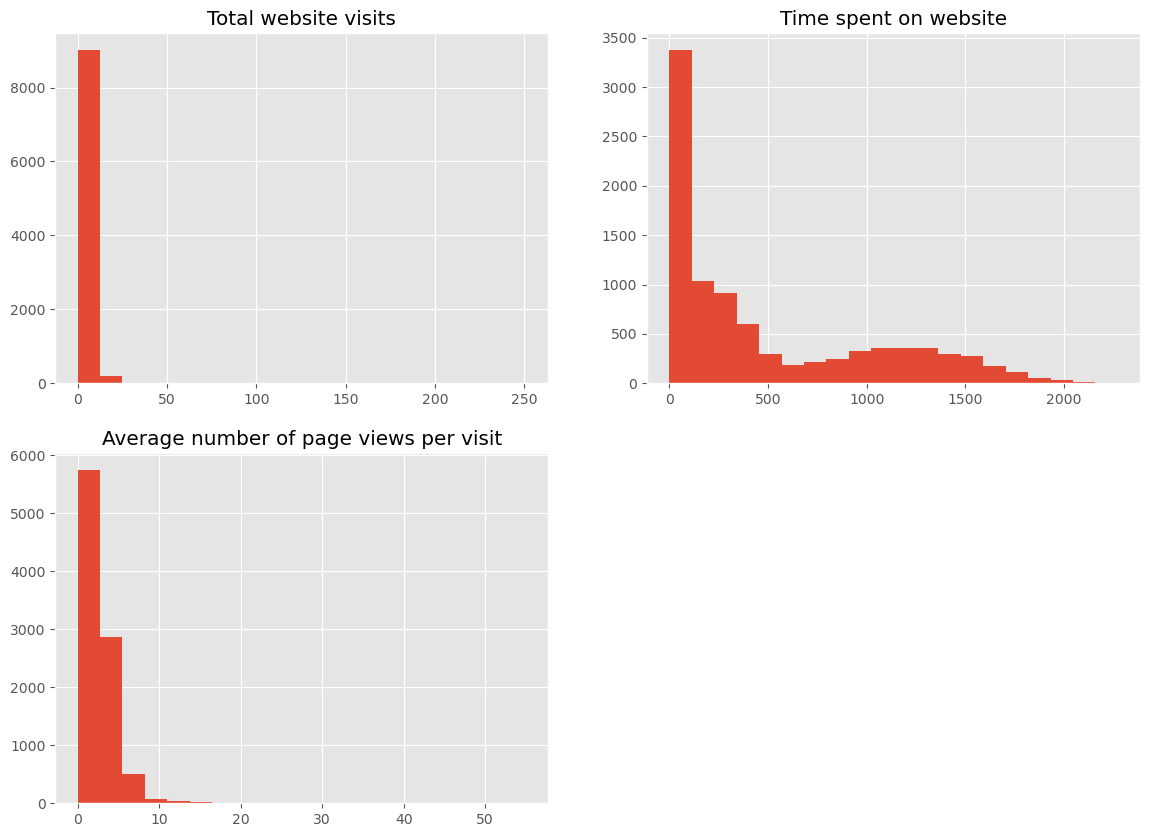

In [45]:
# Set style
plt.style.use('ggplot')

# See distribution of each of these columns
fig = plt.figure(figsize = (14, 10))
plt.subplot(2, 2, 1)
plt.hist(df.total_visits, bins = 20)
plt.title('Total website visits')

plt.subplot(2, 2, 2)
plt.hist(df.time_on_website, bins = 20)
plt.title('Time spent on website')

plt.subplot(2, 2, 3)
plt.hist(df.page_views_per_visit, bins = 20)
plt.title('Average number of page views per visit')

plt.show()

**Observations**
- High peaks and skewed data.
There might be a possibility of outliers.
We will check them next.

# Heatmap

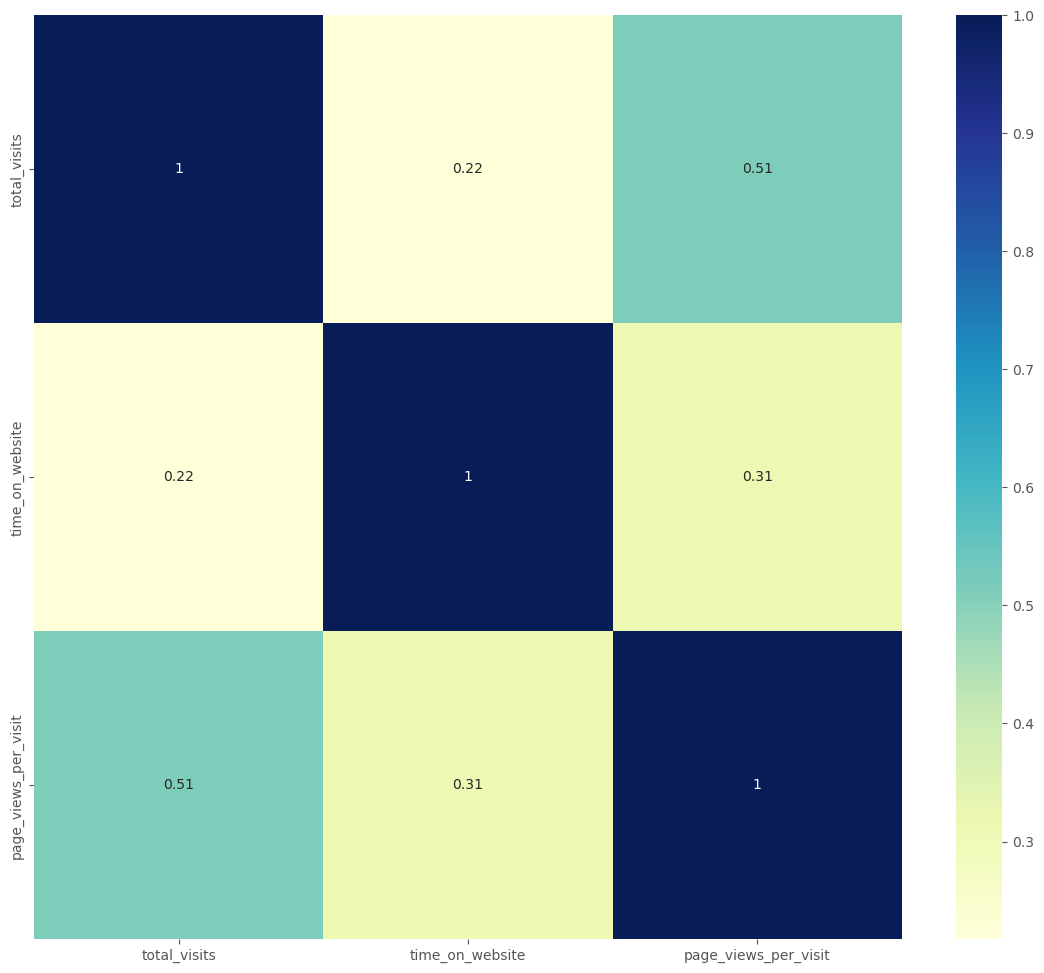

In [46]:
plt.figure(figsize = (14,12))
sns.heatmap(df[['total_visits', 'time_on_website', 'page_views_per_visit']].corr(), cmap="YlGnBu", annot = True)
plt.show()

**Observations**: No significant correlation. So, the columns can be dropped.

# Box Plot

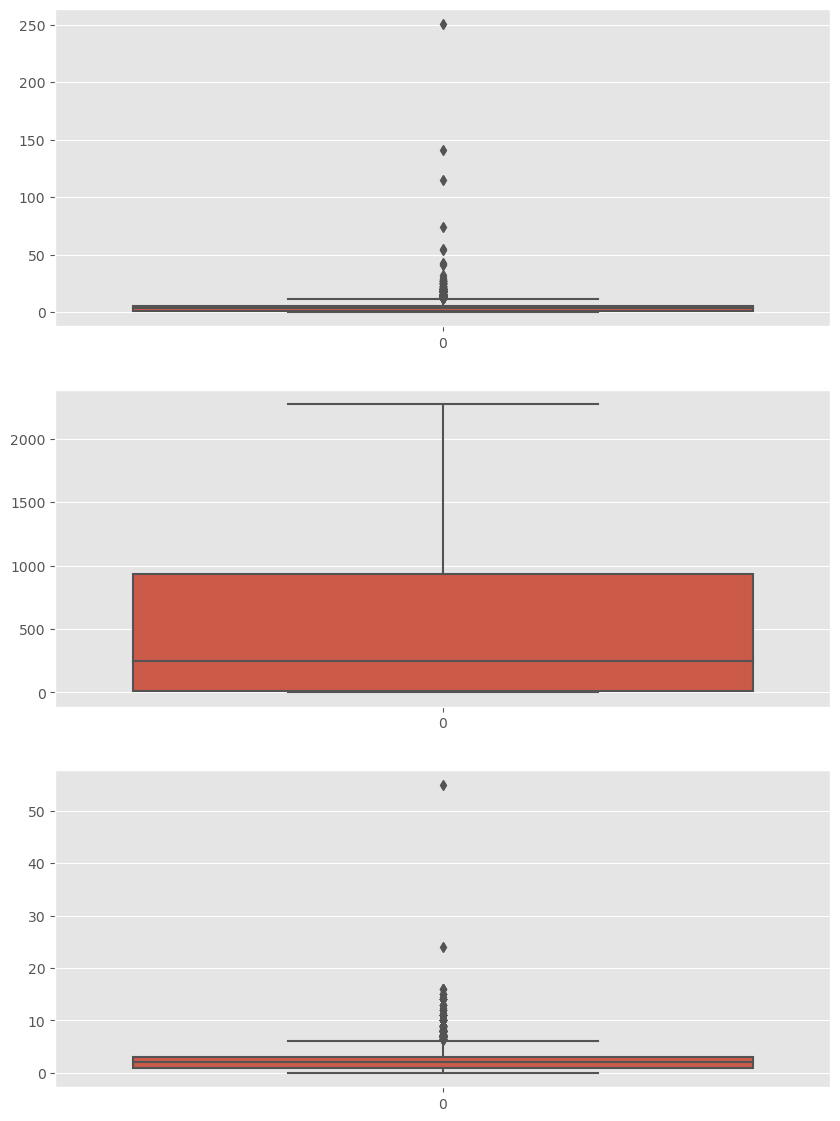

In [47]:
#Checking for outliers
plt.figure(figsize = (10, 14))

plt.subplot(3,1,1)
sns.boxplot(df.total_visits)

plt.subplot(3,1,2)
sns.boxplot(df.time_on_website)

plt.subplot(3,1,3)
sns.boxplot(df.page_views_per_visit)
plt.show()

**Observations**

* There are upper bound outliers in both `total_visits` and `page_views_per_visit` columns.
We can also see that the data can be capped at 99 percentile.

# Categorical columns

# Lead Origin

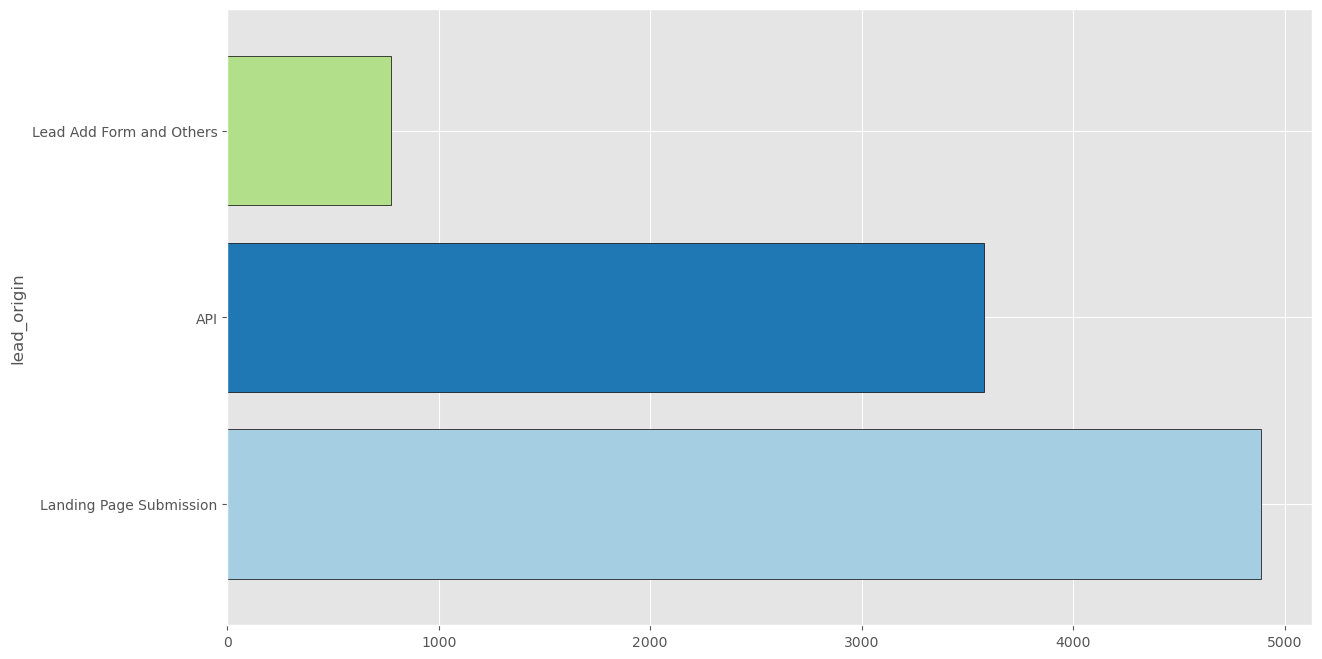

In [48]:
plt.figure(figsize = (14, 8))

df.groupby('lead_origin')['lead_number'].count().sort_values(ascending = False).plot(kind= 'barh', width = 0.8,
                                                            edgecolor = 'black',
                                                            color = plt.cm.Paired(np.arange(len(df))))
plt.show()

In [49]:
df.head(1)

,lead_number,lead_origin,lead_source,do_not_email,converted,total_visits,time_on_website,page_views_per_visit,specialization,occupation,city,mastering_interview
0,660737,API,Olark Chat,No,0,0,0,0.0,Industry Specializations,Unemployed,Mumbai,No


# Lead Source

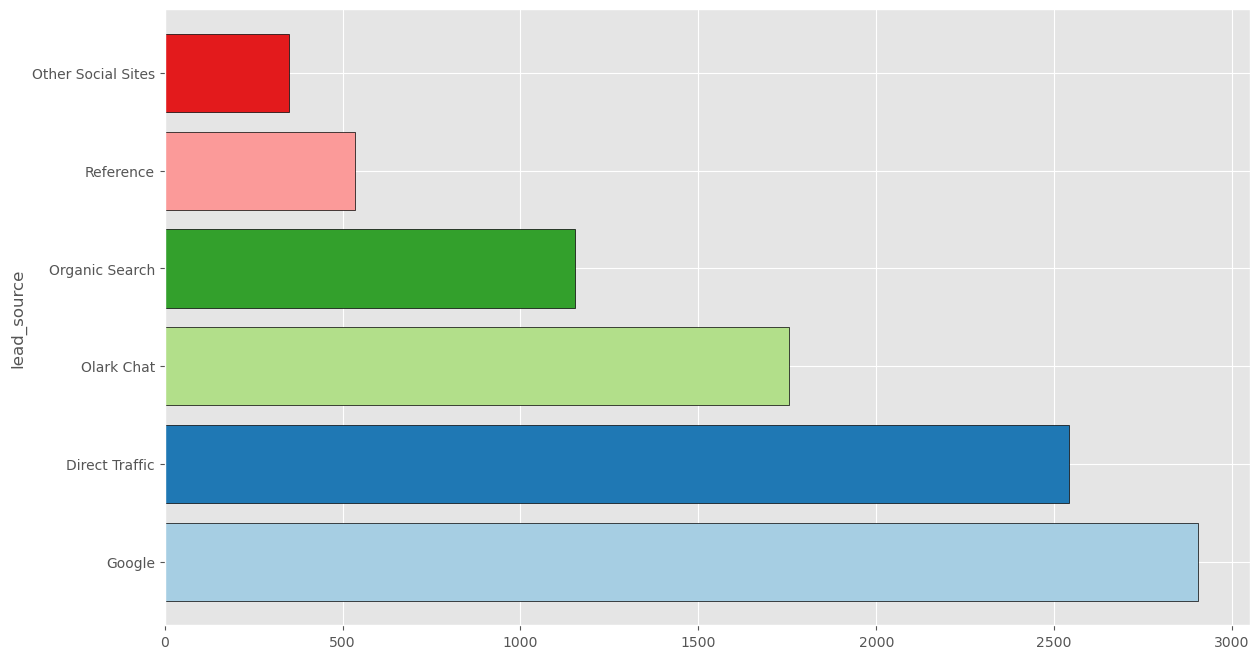

In [50]:
plt.figure(figsize = (14, 8))

df.groupby('lead_source')['lead_number'].count().sort_values(ascending = False).plot(kind= 'barh', width = 0.8,
                                                            edgecolor = 'black',
                                                            color = plt.cm.Paired(np.arange(len(df))))
plt.show()

#### Specialization

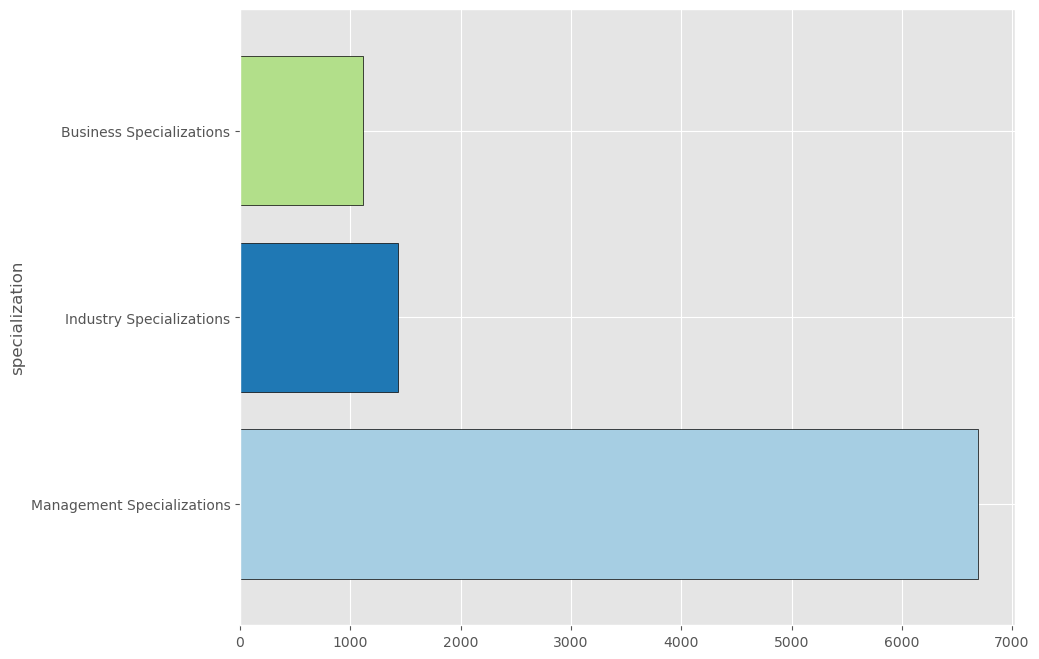

In [51]:
plt.figure(figsize = (10, 8))

df.groupby('specialization')['lead_number'].count().sort_values(ascending = False).plot(kind= 'barh', width = 0.8,
                                                            edgecolor = 'black',
                                                            color = plt.cm.Paired(np.arange(len(df))))
plt.show()

#### Occupation

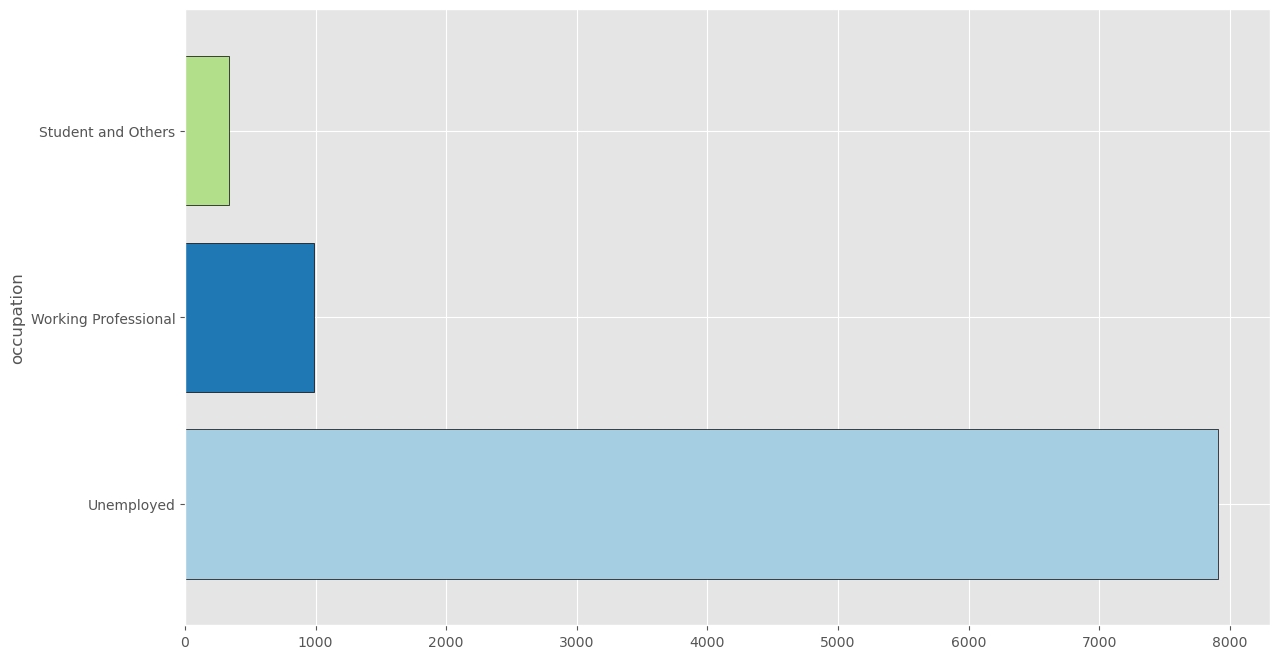

In [52]:
plt.figure(figsize = (14, 8))

df.groupby('occupation')['lead_number'].count().sort_values(ascending = False).plot(kind= 'barh', width = 0.8,
                                                            edgecolor = 'black',
                                                            color = plt.cm.Paired(np.arange(len(df))))
plt.show()

**Observation** : Unempployed users are the most significant leads.

#### City

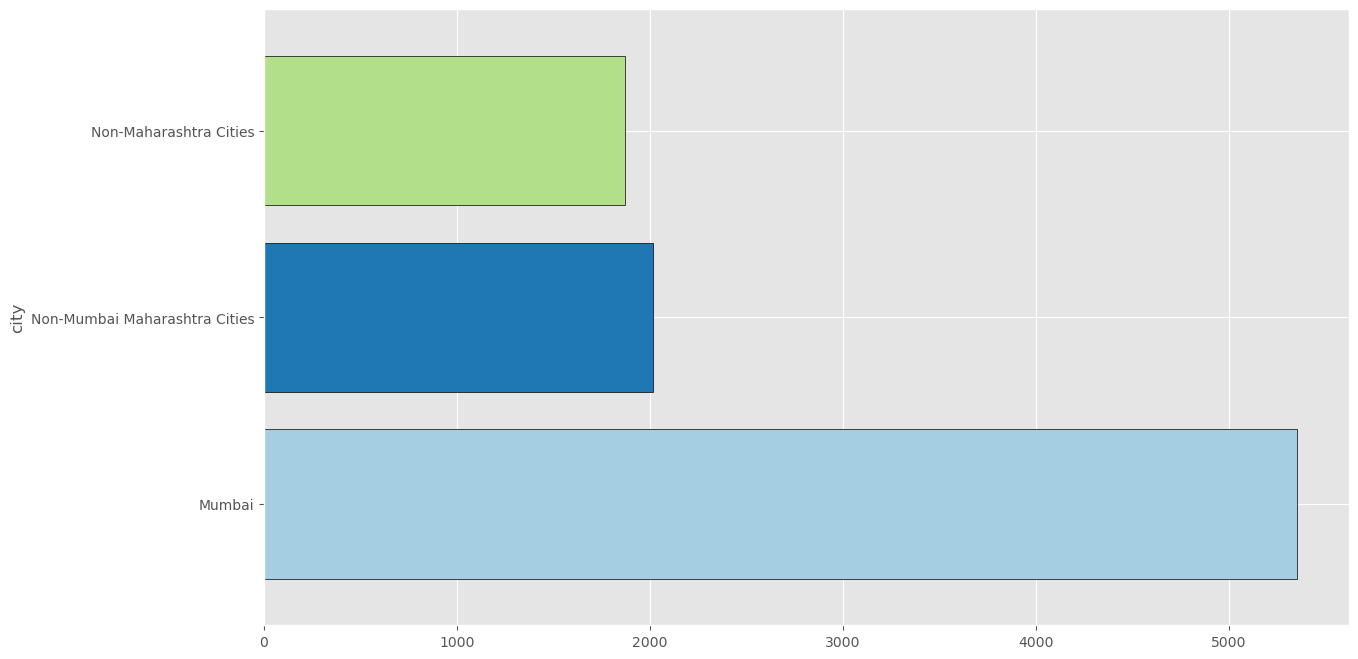

In [53]:
plt.figure(figsize = (14, 8))

df.groupby('city')['lead_number'].count().sort_values(ascending = False).plot(kind= 'barh', width = 0.8,
                                                            edgecolor = 'black',
                                                            color = plt.cm.Paired(np.arange(len(df))))
plt.show()

**Observation**:
*   Mumbai, in particular and Maharashtra, in general dominate the leads.
*    This is likely due to the fact that the courses are based in Mumbai.

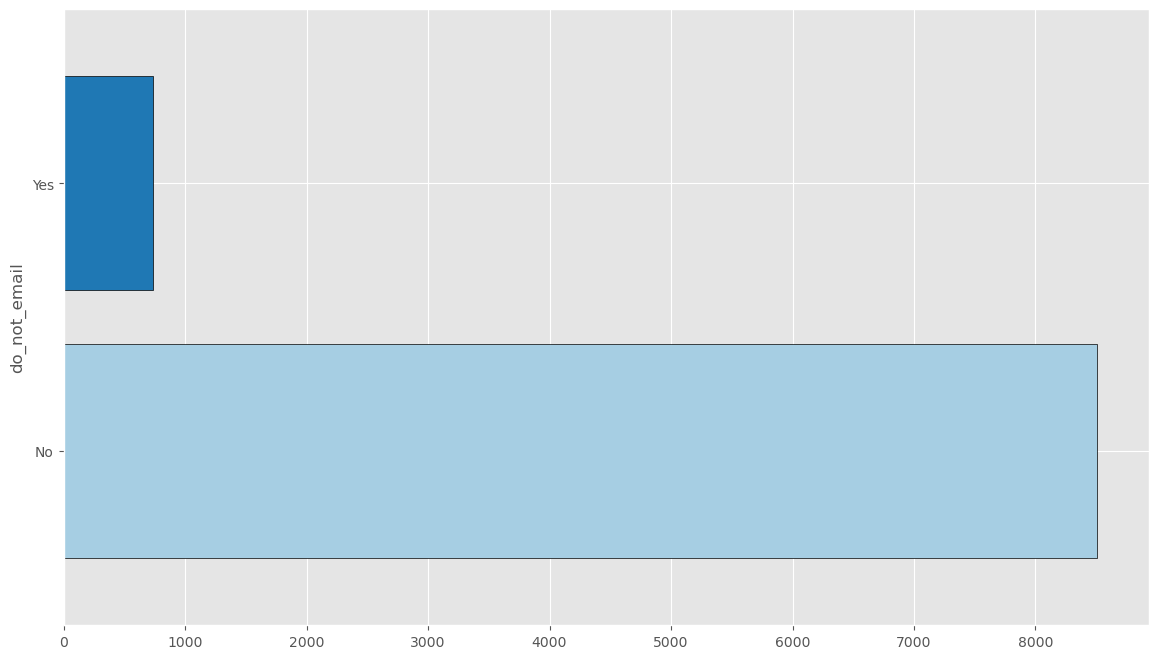

In [54]:
plt.figure(figsize = (14, 8))

df.groupby('do_not_email')['lead_number'].count().sort_values(ascending = False).plot(kind= 'barh', width = 0.8,
                                                            edgecolor = 'black',
                                                            color = plt.cm.Paired(np.arange(len(df))))
plt.show()

# Data Preparation

# Converting Binary (Yes/No) to 0/1

In [55]:
# determine unique values
for k, v in df.select_dtypes(include='object').nunique().to_dict().items():
    print('{} = {}'.format(k,v))

lead_number = 9240
lead_origin = 3
lead_source = 6
do_not_email = 2
specialization = 3
occupation = 3
city = 3
mastering_interview = 2


We have two binary columns: `do_not_email`, `mastering_interview`

In [56]:
binlist = ['do_not_email', 'mastering_interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
df[binlist] = df[binlist].apply(binary_map)

# check the operation was success
df.head()

,lead_number,lead_origin,lead_source,do_not_email,converted,total_visits,time_on_website,page_views_per_visit,specialization,occupation,city,mastering_interview
0,660737,API,Olark Chat,0,0,0,0,0.0,Industry Specializations,Unemployed,Mumbai,0
1,660728,API,Organic Search,0,0,5,674,2.5,Industry Specializations,Unemployed,Mumbai,0
2,660727,Landing Page Submission,Direct Traffic,0,1,2,1532,2.0,Business Specializations,Student and Others,Mumbai,1
3,660719,Landing Page Submission,Direct Traffic,0,0,1,305,1.0,Industry Specializations,Unemployed,Mumbai,0
4,660681,Landing Page Submission,Google,0,1,2,1428,1.0,Management Specializations,Unemployed,Mumbai,0


### Creating dummy variable for categorical columns

Categorical columns are: `lead_origin`, `lead_source`, `specialization`, `occupation`, `city`

In [57]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(df[['lead_origin', 'lead_source', 'specialization', 'occupation', 'city']], drop_first = True)

# Adding the results to the master dataframe
df = pd.concat([df, dummy1], axis=1)

In [58]:
# Dropping the columns for which dummies have been created
df.drop(['lead_origin', 'lead_source', 'specialization', 'occupation', 'city'], axis = 1, inplace = True)

df.head()

,lead_number,do_not_email,converted,total_visits,time_on_website,page_views_per_visit,mastering_interview,lead_origin_Landing Page Submission,lead_origin_Lead Add Form and Others,lead_source_Google,lead_source_Olark Chat,lead_source_Organic Search,lead_source_Other Social Sites,lead_source_Reference,specialization_Industry Specializations,specialization_Management Specializations,occupation_Unemployed,occupation_Working Professional,city_Non-Maharashtra Cities,city_Non-Mumbai Maharashtra Cities
0,660737,0,0,0,0,0.0,0,0,0,0,1,0,0,0,1,0,1,0,0,0
1,660728,0,0,5,674,2.5,0,0,0,0,0,1,0,0,1,0,1,0,0,0
2,660727,0,1,2,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
3,660719,0,0,1,305,1.0,0,1,0,0,0,0,0,0,1,0,1,0,0,0
4,660681,0,1,2,1428,1.0,0,1,0,1,0,0,0,0,0,1,1,0,0,0


### Outliers Treatment

In [59]:
num_cols = df[['total_visits', 'time_on_website', 'page_views_per_visit']]

# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_cols.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,total_visits,time_on_website,page_views_per_visit
count,9240.000000,9240.000000,9240.000000
mean,3.438636,487.698268,2.357440
std,4.819024,548.021466,2.145781
min,0.000000,0.000000,0.000000
25%,1.000000,12.000000,1.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
90%,7.000000,1380.000000,5.000000
95%,10.000000,1562.000000,6.000000
99%,17.000000,1840.610000,9.000000


In [60]:
# capping at 99 percentile
df.total_visits.loc[df.total_visits >= df.total_visits.quantile(0.99)] = df.total_visits.quantile(0.99)
df.page_views_per_visit.loc[df.page_views_per_visit >=
                            df.page_views_per_visit.quantile(0.99)] = df.page_views_per_visit.quantile(0.99)

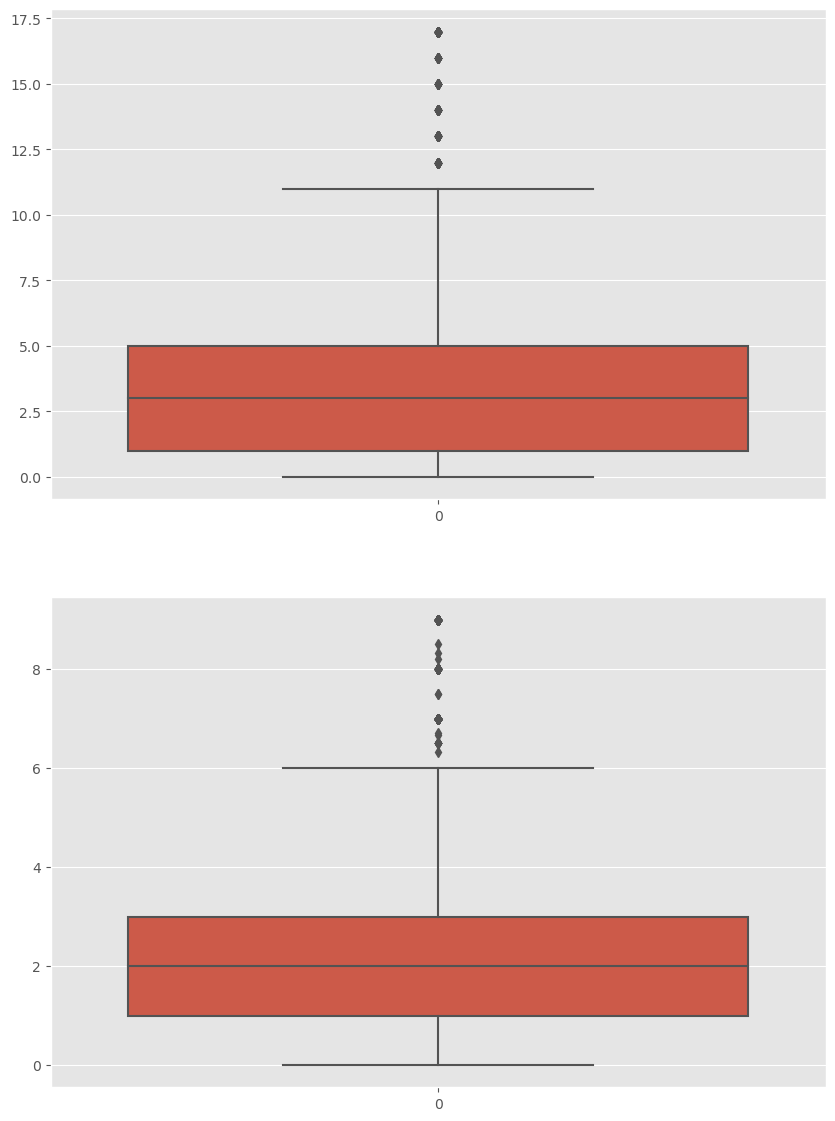

In [61]:
plt.figure(figsize = (10, 14))

plt.subplot(2,1,1)
sns.boxplot(df.total_visits)

plt.subplot(2,1,2)
sns.boxplot(df.page_views_per_visit)
plt.show()

As can be seen from the above plots, we were able to significantly reduce the number of outliers by capping.

### Test-Train Split

In [62]:
# Putting feature variable to X
X = df.drop(['lead_number', 'converted'], axis=1)

X.head(1)

,do_not_email,total_visits,time_on_website,page_views_per_visit,mastering_interview,lead_origin_Landing Page Submission,lead_origin_Lead Add Form and Others,lead_source_Google,lead_source_Olark Chat,lead_source_Organic Search,lead_source_Other Social Sites,lead_source_Reference,specialization_Industry Specializations,specialization_Management Specializations,occupation_Unemployed,occupation_Working Professional,city_Non-Maharashtra Cities,city_Non-Mumbai Maharashtra Cities
0,0,0,0,0.0,0,0,0,0,1,0,0,0,1,0,1,0,0,0


In [63]:
# Putting response variable to y
y = df['converted']

y.head(1)

0    0
Name: converted, dtype: int64

In [64]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Feature Scaling

In [65]:
scaler = StandardScaler()

X_train[['total_visits','time_on_website','page_views_per_visit']] = scaler.fit_transform(
    X_train[['total_visits','time_on_website','page_views_per_visit']])

X_train.head()

,do_not_email,total_visits,time_on_website,page_views_per_visit,mastering_interview,lead_origin_Landing Page Submission,lead_origin_Lead Add Form and Others,lead_source_Google,lead_source_Olark Chat,lead_source_Organic Search,lead_source_Other Social Sites,lead_source_Reference,specialization_Industry Specializations,specialization_Management Specializations,occupation_Unemployed,occupation_Working Professional,city_Non-Maharashtra Cities,city_Non-Mumbai Maharashtra Cities
1871,0,-1.022595,-0.885371,-1.180474,0,0,0,0,1,0,0,0,0,1,1,0,0,0
6795,0,0.205373,0.005716,-0.503379,1,1,0,0,0,0,0,0,1,0,1,0,1,0
3516,0,0.512365,-0.691418,0.092260,0,0,0,0,1,0,0,0,0,0,1,0,0,0
8105,0,0.512365,1.365219,1.364995,0,1,0,1,0,0,0,0,1,0,1,0,0,0
3934,0,-1.022595,-0.885371,-1.180474,0,0,0,0,1,0,0,0,0,1,1,0,1,0


In [66]:
# checking the conversion rate
conversion = (sum(df['converted'])/len(df['converted'].index))*100
conversion

38.53896103896104

**The conversion rate is approximately 38.5%.**

### Looking at correlations

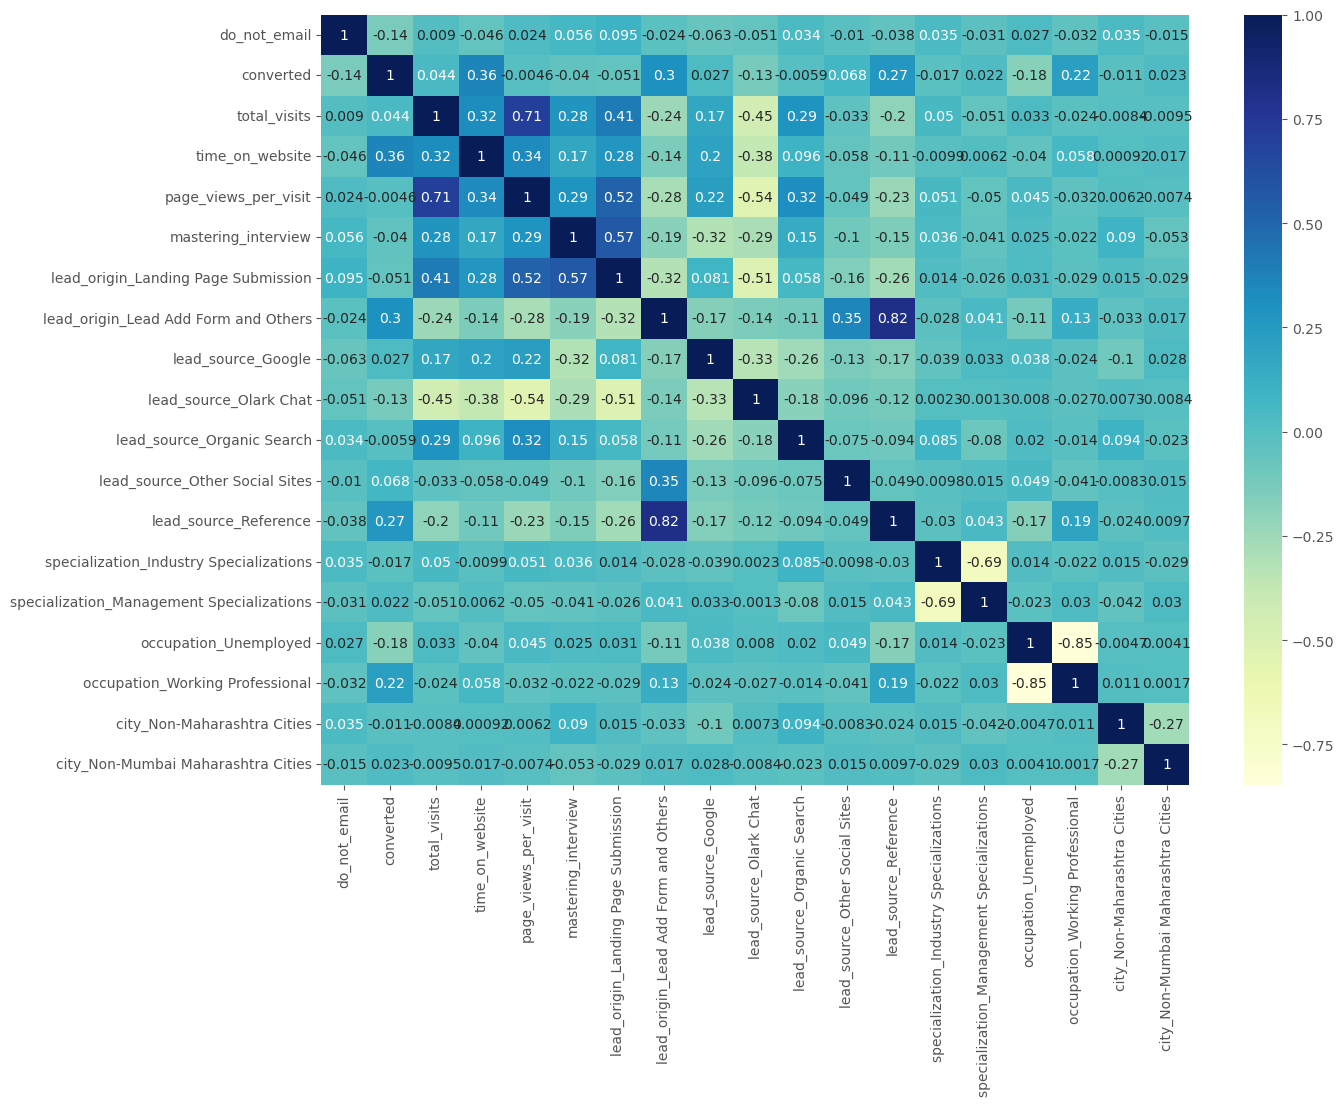

In [67]:
# Let's see the correlation matrix
plt.figure(figsize = (14,10))
sns.heatmap(df.corr(),annot = True, cmap="YlGnBu")
plt.show()

#### Drop highly correlated dummy variables

In [68]:
X_test.drop(['lead_origin_Lead Add Form and Others', 'specialization_Industry Specializations',
                     'occupation_Working Professional'], axis = 1, inplace = True)

X_train.drop(['lead_origin_Lead Add Form and Others', 'specialization_Industry Specializations',
                     'occupation_Working Professional'], axis = 1, inplace = True)

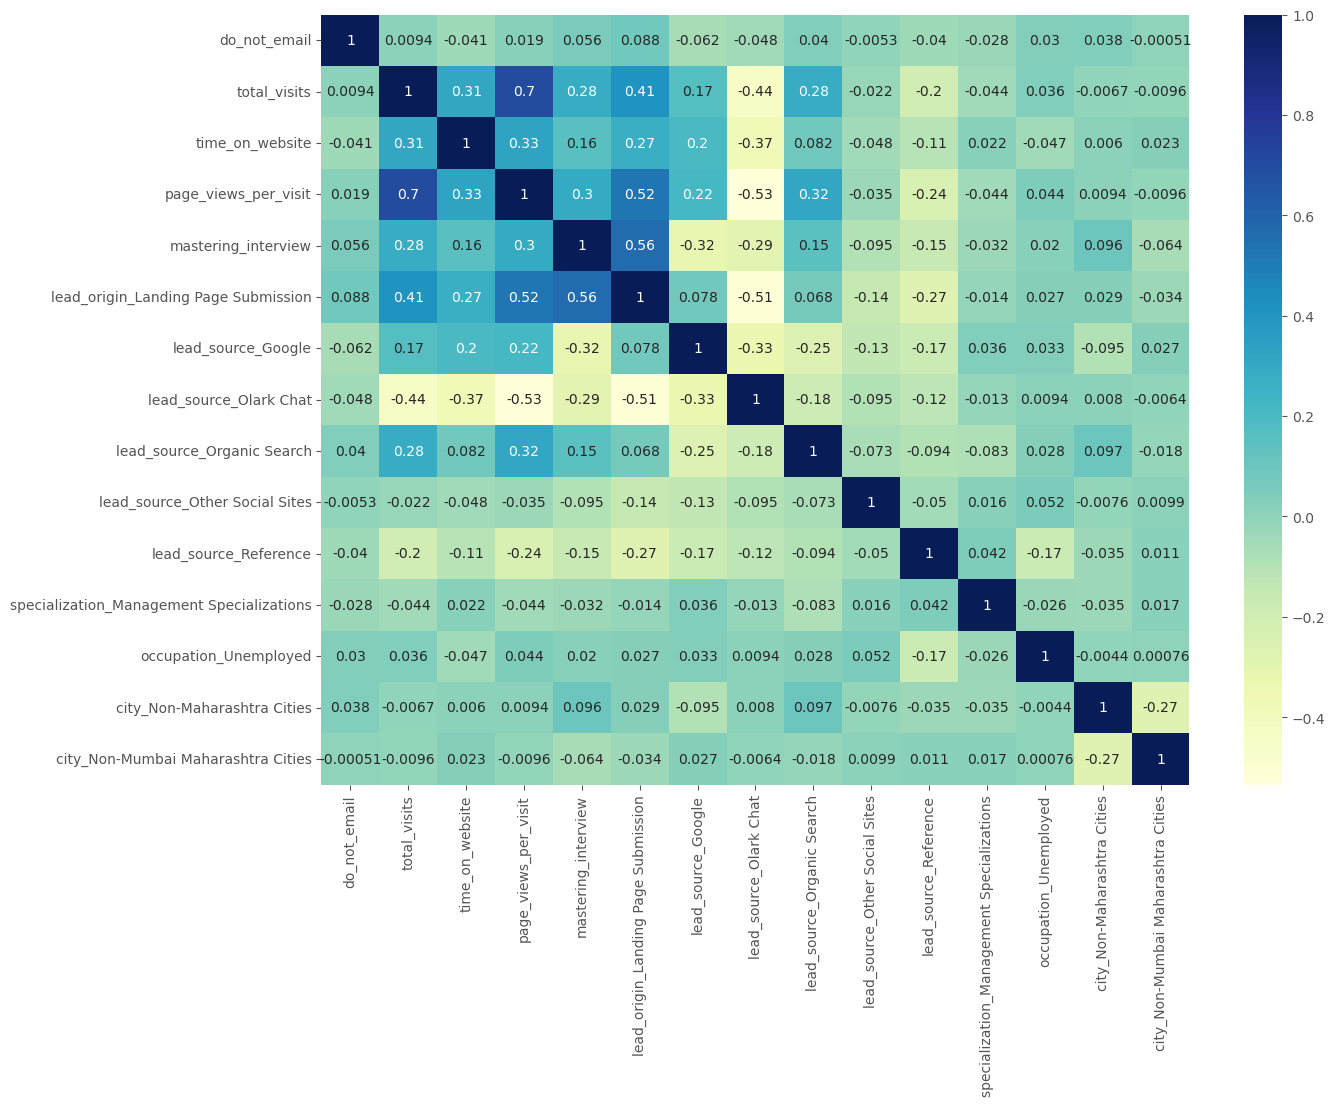

In [69]:
## Rechecking the correlation matrix
plt.figure(figsize = (14,10))
sns.heatmap(X_train.corr(),annot = True, cmap="YlGnBu")
plt.show()

# Model Building

We will use Logistic Regression with RFE in order to build two suitable models as follows:

1.   **Model with Moderate Accuracy**: <br>To get wider range of audience to target upon.<br> (In case we have more resource to engage wider range of audience).
2.   **Model with High Accuracy**: <br>To get narrow range of audience to target upon. <br>(In case we have less resource and want to minimize engagement).




# Feature Selection using RFE

In [70]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# initiate logistic regression model
logreg = LogisticRegression()

# initiate rfe
rfe = RFE(estimator=logreg, n_features_to_select=15)
# running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [71]:
# Let's take a look at which features have been selected by RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('do_not_email', True, 1),
 ('total_visits', True, 1),
 ('time_on_website', True, 1),
 ('page_views_per_visit', True, 1),
 ('mastering_interview', True, 1),
 ('lead_origin_Landing Page Submission', True, 1),
 ('lead_source_Google', True, 1),
 ('lead_source_Olark Chat', True, 1),
 ('lead_source_Organic Search', True, 1),
 ('lead_source_Other Social Sites', True, 1),
 ('lead_source_Reference', True, 1),
 ('specialization_Management Specializations', True, 1),
 ('occupation_Unemployed', True, 1),
 ('city_Non-Maharashtra Cities', True, 1),
 ('city_Non-Mumbai Maharashtra Cities', True, 1)]

In [72]:
# Put all the columns selected by RFE in the variable 'col'

col = X_train.columns[rfe.support_]

Now you have all the variables selected by RFE and since we care about the statistics part, i.e. the p-values and the VIFs, let's use these variables to create a logistic regression model using statsmodels.

In [73]:
# Select only the columns selected by RFE

X_train = X_train[col]

In [74]:
# Import statsmodels

import statsmodels.api as sm

In [75]:
# Fit a logistic Regression model on X_train after adding a constant and output the summary

X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3298.2
Date:                Mon, 11 Mar 2024   Deviance:                       6596.4
Time:                        20:54:53   Pearson chi2:                 6.65e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2662
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                        -0.2319      0.146     -1.585      0.113      -0.519       0.055
do_not_email                                 -1.2194      0.144     -8.454      0.000      -1.502      -0.937
total_visits                                  0.1437      0.042      3.433      0.001       0.062       0.226
time_on_website                               1.0417      0.036     29.233      0.000       0.972       1.112
page_views_per_visit                         -0.1809      0.048     -3.739      0.000      -0.276      -0.086
mastering_interview                          -0.0020      0.094     -0.021      0.983      -0.186       0.182
lead_origin_Landing Page Submission          -0.0109      0.092     -0.118      0.906      -0.192       0.170
lead_source_Google                            0.3654      0.100      3.640      0.000       0.169       0.562
lead_source_Olark Chat                        0.6609      0.137      4.836      0.000       0.393       0.929
lead_source_Organic Search                    0.2272      0.116      1.959      0.050      -0.000       0.455
lead_source_Other Social Sites                1.6456      0.175      9.404      0.000       1.303       1.989
lead_source_Reference                         3.9516      0.221     17.875      0.000       3.518       4.385
specialization_Management Specializations    -0.0051      0.069     -0.075      0.941      -0.140       0.129
occupation_Unemployed                        -0.9362      0.086    -10.870      0.000      -1.105      -0.767
city_Non-Maharashtra Cities                   0.0700      0.079      0.884      0.377      -0.085       0.225
city_Non-Mumbai Maharashtra Cities            0.0329      0.076      0.432      0.666      -0.117       0.182
=============================================================================================================
"""

There are quite a few variable which have a p-value greater than `0.05`. We will need to take care of them. But first, let's also look at the VIFs.

In [76]:
# Import 'variance_inflation_factor'

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [77]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,occupation_Unemployed,5.28
5,lead_origin_Landing Page Submission,4.13
11,specialization_Management Specializations,3.24
4,mastering_interview,2.74
3,page_views_per_visit,2.56
7,lead_source_Olark Chat,2.43
6,lead_source_Google,2.41
1,total_visits,2.03
8,lead_source_Organic Search,1.47
13,city_Non-Maharashtra Cities,1.35


VIFs seem to be in a decent range.

# Model Evaluation

# Model Evaluation

Now, both the p-values and VIFs seem decent enough for all the variables. So let's go ahead and make predictions using this final set of features.

In [78]:
# Use 'predict' to predict the probabilities on the train set

y_train_pred = res.predict(sm.add_constant(X_train))
y_train_pred[:10]

1871    0.202928
6795    0.271999
3516    0.236762
8105    0.607145
3934    0.214482
4844    0.852792
3297    0.164098
8071    0.970545
987     0.761360
7423    0.787492
dtype: float64

In [79]:
# Reshaping it into an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.20292843, 0.27199878, 0.23676212, 0.60714491, 0.21448214,
       0.85279228, 0.16409792, 0.97054525, 0.76135983, 0.78749195])

Creating a dataframe with the actual conversion flag and the predicted probabilities:

In [80]:
# Create a new dataframe containing the actual conversion flag and the probabilities predicted by the model

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.202928
1,0,0.271999
2,0,0.236762
3,0,0.607145
4,0,0.214482


#### Creating new column 'Predicted' with 1 if Paid_Prob > 0.5 else 0

In [81]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.202928,0
1,0,0.271999,0
2,0,0.236762,0
3,0,0.607145,1
4,0,0.214482,0


In [82]:
# Import metrics from sklearn for evaluation

from sklearn import metrics

In [83]:
# Create confusion matrix

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3491  511]
 [1023 1443]]


In [84]:
# Creating custom function to show matrix

def LeadMetrics(Converted,final):
    confusion = metrics.confusion_matrix(Converted, final)
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives
    sensitivity = TP / float(TP+FN)
    specificity = TN / float(TN+FP)
    precision = precision_score(Converted , final)
    recall = recall_score(Converted, final)
    accuracy = metrics.accuracy_score(Converted, final)
    print(f"Confusion Matrix is       :{confusion}")
    print(f"Accuracy for model is   :{accuracy}")
    print(f"Sensitivity for model is   :{sensitivity}")
    print(f"Specificity for model is   :{specificity}")
    print(f"Precision for model is    :{precision}")
    print(f"Recall for model is         :{recall}")

In [85]:
LeadMetrics(y_train_pred_final.Converted, y_train_pred_final.Predicted )

Confusion Matrix is       :[[3491  511]
 [1023 1443]]
Accuracy for model is   :0.7628324056895486
Sensitivity for model is   :0.5851581508515815
Specificity for model is   :0.8723138430784607
Precision for model is    :0.7384851586489253
Recall for model is         :0.5851581508515815


In [86]:
# Let's check the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7628324056895486


In [87]:
# Let's evaluate the other metrics as well

TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [88]:
# Calculate the sensitivity

TP/(TP+FN)

0.5851581508515815

In [89]:
# Calculate the specificity

TN/(TN+FP)

0.8723138430784607

### Finding the Optimal Cutoff

Now 0.5 was just arbitrary to loosely check the model performace. But in order to get good results, you need to optimise the threshold. So first let's plot an ROC curve to see what AUC we get.

In [90]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [91]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

In [92]:
# Import matplotlib to plot the ROC curve

import matplotlib.pyplot as plt

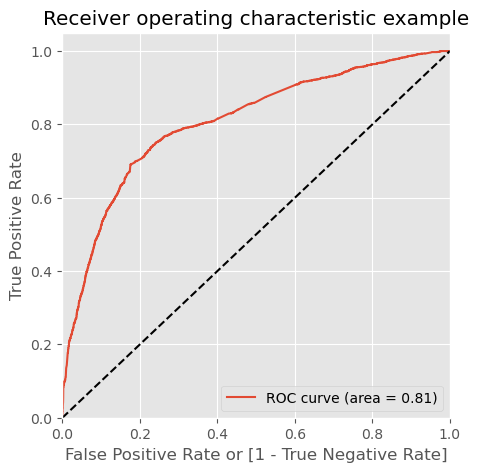

In [93]:
# Call the ROC function

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

The area under the curve of the ROC is 0.81 which is quite good. <br>
So, we seem to have a good model. <br>
Let's also check the sensitivity and specificity tradeoff to find the optimal cutoff point.

In [94]:
# Let's create columns with different probability cutoffs

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.202928,0,1,1,1,0,0,0,0,0,0,0
1,0,0.271999,0,1,1,1,0,0,0,0,0,0,0
2,0,0.236762,0,1,1,1,0,0,0,0,0,0,0
3,0,0.607145,1,1,1,1,1,1,1,1,0,0,0
4,0,0.214482,0,1,1,1,0,0,0,0,0,0,0


In [95]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.427180  0.991484  0.079460
0.2   0.2  0.588281  0.910381  0.389805
0.3   0.3  0.749072  0.765612  0.738881
0.4   0.4  0.768553  0.696675  0.812844
0.5   0.5  0.762832  0.585158  0.872314
0.6   0.6  0.751237  0.492295  0.910795
0.7   0.7  0.720470  0.352798  0.947026
0.8   0.8  0.693568  0.239254  0.973513
0.9   0.9  0.652443  0.095702  0.995502


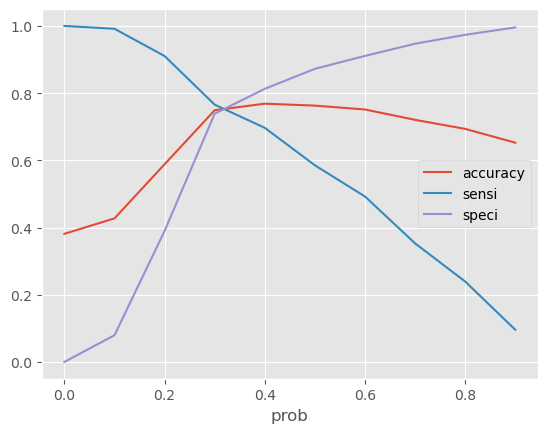

In [96]:
# Let's plot it as well

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

As you can see that around 0.30, you get the optimal values of the three metrics. So let's choose 0.30 as our cutoff now.

In [97]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.30 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.202928,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.271999,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.236762,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.607145,1,1,1,1,1,1,1,1,0,0,0,1
4,0,0.214482,0,1,1,1,0,0,0,0,0,0,0,0


In [98]:
LeadMetrics(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

Confusion Matrix is       :[[2957 1045]
 [ 578 1888]]
Accuracy for model is   :0.7490723562152134
Sensitivity for model is   :0.7656123276561233
Specificity for model is   :0.7388805597201399
Precision for model is    :0.643709512444596
Recall for model is         :0.7656123276561233


In [99]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7490723562152134

In [100]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[2957, 1045],
       [ 578, 1888]], dtype=int64)

In [101]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [102]:
# Calculate Sensitivity

TP/(TP+FN)

0.7656123276561233

In [103]:
# Calculate Specificity

TN/(TN+FP)

0.7388805597201399

This cutoff point seems good to go!